<a href="https://colab.research.google.com/github/martinpius/Computer-Vission/blob/main/Object_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)
try:
  COLAB = True
  import tensorflow as tf
  print(f"You are on CoLaB with tensorflow version: {tf.__version__}")
except Exception as e:
  print(f"{type(e)}: {e}\nplease load your drive...")

def time_fmt(t: float = 123.817)->float:
  h = int(t / (60 * 60))
  m = int(t % (60 * 60)/ 60)
  s = int(t % 60)
  return f"{h}: {m:>02}: {s:>05.2f}"
print(f">>>time testing\tplease wait...\n>>>time elapse:\t{time_fmt()}")

Mounted at /content/drive
You are on CoLaB with tensorflow version: 2.4.1
>>>time testing	please wait...
>>>time elapse:	0: 02: 03.00


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import os, io, time, datetime, sys
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob, shutil, random
import matplotlib.pyplot as plt
from os import path
%matplotlib inline
pd.set_option('max_rows', 6)
pd.set_option('max_columns', 0)
plt.style.use('fivethirtyeight')

In [3]:
#In this notebook we are going to train a model to identify if a picture is a cat or a dog:
#Is a simple binary classification problem: 

In [4]:
#From the large dataset of 25000 images for cats and dogs we are going to select few images
#for training (1000), testing (200) and validation (100):
#The following codes create the new folders in a main directory where we stored our images
#and we draw dogs and cats pictures at random then move to these subfolders

In [5]:
os.chdir('/content/drive/MyDrive/train')
if os.path.isdir('train/dog') is False:
  os.makedirs('train/dog')
for c in random.sample(glob.glob('dog*'), 500):
    shutil.move(c, "train/dog")
if os.path.isdir('train/cat') is False:
  os.makedirs('train/cat')
for c in random.sample(glob.glob('cat*'), 500):
  shutil.move(c, 'train/cat')
if os.path.isdir('test/dog') is False:
  os.makedirs('test/dog')
for c in random.sample(glob.glob('dog*'), 100):
  shutil.move(c, 'test/dog')
if os.path.isdir('test/cat') is False:
  os.makedirs('test/cat')
for c in random.sample(glob.glob('cat*'), 100):
  shutil.move(c,'test/cat')
if os.path.isdir('valid/dog') is False:
  os.makedirs('valid/dog')
for c in random.sample(glob.glob('dog*'), 50):
  shutil.move(c, 'valid/dog')
if os.path.isdir('valid/cat') is False:
  os.makedirs('valid/cat')
for c in random.sample(glob.glob('cat*'), 50):
  shutil.move(c, 'valid/cat')

In [6]:
#We now read our images in batches into our notebook using the following codes snippest

In [7]:
#We first create the path were our training, validation and test data are located
train_path = "/content/drive/MyDrive/train/train"
test_path = "/content/drive/MyDrive/train/test"
validation_path = "/content/drive/MyDrive/train/valid"

In [8]:
#We are going to do perform a transfer learning using vgg16 model:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory = train_path, target_size = (224,224), batch_size = 10, classes = ['cat', 'dog'])
validation_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory = test_path, target_size = (224,224), batch_size = 10, classes = ['cat', 'dog'])
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory = validation_path, target_size = (224,224), batch_size = 10, shuffle = False,classes = ['cat', 'dog'])

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [50]:
#Just to be sure with the sizes of loaded data in each category
assert train_batches.n == 2000
assert validation_batches.n == 400
assert test_batches.n == 200
assert train_batches.num_classes == test_batches.num_classes == validation_batches.num_classes == 2

In [11]:
#plotting some few images on the train dataset:

In [12]:
def _plot_images(imgs):
  fig, axes = plt.subplots(1, 10, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(imgs, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()



In [13]:
#Get a sample batch and plot them to see how they real represent what we thought:

In [14]:
imgs, labels = next(iter(train_batches))

In [15]:
print(f"images_shape: {imgs.shape}, number_of_classes: {labels.shape}")

images_shape: (10, 224, 224, 3), number_of_classes: (10, 2)


In [16]:
print(labels) # one-hot vector (1.0=cat, 0.1 = dog)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

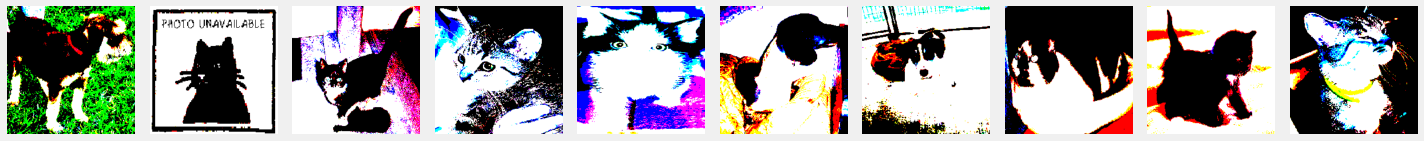

In [17]:
_plot_images(imgs = imgs)

In [18]:
#Now we can build our simple vgg16 model and finally we will use transfer learning approach and 
#compare the two:

In [19]:
class CNN_BLOCK(tf.keras.layers.Layer):
  def __init__(self, num_filters, kernels = 3, *args, **kwargs):
    super(CNN_BLOCK, self).__init__(*args, **kwargs)
    self.conv = tf.keras.layers.Conv2D(filters = num_filters, kernel_size = kernels, 
                                       padding = 'same', activation = 'relu', strides = (1,1),
                                       kernel_initializer = 'random_normal')
    self.bn = tf.keras.layers.BatchNormalization()
  
  def call(self, inputs_tensor, training = False):
    x = self.conv(inputs_tensor, training = training)
    return self.bn(x)

In [20]:
class VGG16BLOCK(tf.keras.layers.Layer):
  def __init__(self, num_filters, *args, **kwargs):
    super(VGG16BLOCK, self).__init__(*args, **kwargs)
    self.block1 = CNN_BLOCK(num_filters = num_filters[0], name = 'blok_1')
    self.block2 = CNN_BLOCK(num_filters = num_filters[1], name = 'block_2')
    self.block3 = CNN_BLOCK(num_filters = num_filters[2], name = 'block_3')
    self.block4 = CNN_BLOCK(num_filters = num_filters[3], name = 'block_3')
    self.max_pooling = tf.keras.layers.MaxPooling2D()
  def call(self, inputs_tensor, training = False):
    x = self.block1(inputs_tensor, training = training)
    x = self.block2(x, training = training)
    x = self.block3(x, training = training)
    x = self.block4(x, training = training)
    return self.max_pooling(x)
  

In [26]:
class VGG_16NET(tf.keras.Model):
  def __init__(self, num_classes, *args, **kwargs):
    super(VGG_16NET, self).__init__(*args, **kwargs)
    self.vgg_block1 = VGG16BLOCK([32,64,64,128], name = 'vggblock_1')
    self.vgg_block2 = VGG16BLOCK([64,128,128, 256], name = 'vggblock_2')
    self.vgg_block3 = VGG16BLOCK([128,256,256,512], name = 'vggblock_3')
    self.glb_pool = tf.keras.layers.GlobalAveragePooling2D()
    self.dense1 = tf.keras.layers.Dense(units = 128, activation = 'relu', name = 'dense_1')
    self.dense2 = tf.keras.layers.Dense(units = 32, activation = 'relu', name = 'dense2')
    self.outputs = tf.keras.layers.Dense(units = 2, activation = 'sigmoid')
  def call(self, inputs_tensor, training = False):
    x = self.vgg_block1(inputs_tensor, training = training)
    x = self.vgg_block2(x, training = training)
    x = self.vgg_block3(x, training = training)
    x = self.glb_pool(x)
    x = self.dense1(x, training = training)
    x = self.dense2(x, training = training)
    x = self.outputs(x, training = training)
    return x

In [27]:
#Instantiating the model class, comiling and training using the above data

In [105]:
model = VGG_16NET(2)

In [106]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits = False),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = tf.keras.metrics.CategoricalAccuracy())

In [107]:
tic = time.time()
model.fit(train_batches,
          validation_data = validation_batches,
          steps_per_epoch = 200,
          epochs = 20, 
          verbose = 2, validation_steps = 40)
toc = time.time()
print(f"\ntime elapse: {time_fmt(toc - tic)}")


Epoch 1/20
200/200 - 60s - loss: 0.7200 - categorical_accuracy: 0.5420 - val_loss: 0.7229 - val_categorical_accuracy: 0.5325
Epoch 2/20
200/200 - 58s - loss: 0.6910 - categorical_accuracy: 0.5435 - val_loss: 1.5819 - val_categorical_accuracy: 0.5250
Epoch 3/20
200/200 - 58s - loss: 0.6958 - categorical_accuracy: 0.5145 - val_loss: 0.8686 - val_categorical_accuracy: 0.5225
Epoch 4/20
200/200 - 58s - loss: 0.6819 - categorical_accuracy: 0.5635 - val_loss: 0.6927 - val_categorical_accuracy: 0.5300
Epoch 5/20
200/200 - 58s - loss: 0.6752 - categorical_accuracy: 0.5755 - val_loss: 0.6711 - val_categorical_accuracy: 0.5675
Epoch 6/20
200/200 - 58s - loss: 0.6802 - categorical_accuracy: 0.5660 - val_loss: 0.6835 - val_categorical_accuracy: 0.5225
Epoch 7/20
200/200 - 58s - loss: 0.6699 - categorical_accuracy: 0.5710 - val_loss: 0.7032 - val_categorical_accuracy: 0.5450
Epoch 8/20
200/200 - 58s - loss: 0.6654 - categorical_accuracy: 0.5880 - val_loss: 0.7325 - val_categorical_accuracy: 0.5700


In [108]:
#The above model may improve accuracy by training longer
#Now lets consider a transfer learning approach:

In [97]:
model1 = tf.keras.applications.vgg16.VGG16()

In [98]:
model1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [36]:
#Extracting necessery layers from the base model and adding the output layer of our choice:

In [99]:
trf_model = tf.keras.models.Sequential()
for layer in model1.layers[:-1]:
  trf_model.add(layer)

In [100]:
#set the weights for each layer to untrainable(no need to train the model again)
for layer in trf_model.layers:
  layer.trainable = False

In [101]:
#Adding the output shape of our choice (in this case we add the dense layer with 2 units)
trf_model.add(tf.keras.layers.Dense(units = 2, activation = 'softmax', name = 'new_out'))
trf_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [102]:
#Compiling and training our model:

In [103]:
trf_model.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits = False),
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [104]:
tic = time.time()
trf_model.trainable = False #Do not training (use the weights directly from vgg16-model)
trf_model.fit(train_batches, validation_data = validation_batches, epochs = 20, verbose = 2)
toc = time.time()
print(f"\ntraining and evaluation time is: {time_fmt(toc - tic)}")

Epoch 1/20
200/200 - 14s - loss: 0.1321 - accuracy: 0.9540 - val_loss: 0.1128 - val_accuracy: 0.9700
Epoch 2/20
200/200 - 13s - loss: 0.0320 - accuracy: 0.9860 - val_loss: 0.0805 - val_accuracy: 0.9750
Epoch 3/20
200/200 - 14s - loss: 0.0089 - accuracy: 0.9955 - val_loss: 0.0934 - val_accuracy: 0.9800
Epoch 4/20
200/200 - 13s - loss: 0.0027 - accuracy: 0.9985 - val_loss: 0.0857 - val_accuracy: 0.9800
Epoch 5/20
200/200 - 14s - loss: 7.8944e-04 - accuracy: 1.0000 - val_loss: 0.0836 - val_accuracy: 0.9775
Epoch 6/20
200/200 - 14s - loss: 3.3552e-04 - accuracy: 1.0000 - val_loss: 0.0849 - val_accuracy: 0.9800
Epoch 7/20
200/200 - 14s - loss: 2.7523e-04 - accuracy: 1.0000 - val_loss: 0.0823 - val_accuracy: 0.9800
Epoch 8/20
200/200 - 14s - loss: 2.1840e-04 - accuracy: 1.0000 - val_loss: 0.0822 - val_accuracy: 0.9800
Epoch 9/20
200/200 - 14s - loss: 1.9092e-04 - accuracy: 1.0000 - val_loss: 0.0816 - val_accuracy: 0.9800
Epoch 10/20
200/200 - 14s - loss: 1.6874e-04 - accuracy: 1.0000 - val_l